## Imports and definitions

In [1]:
from fastai.conv_learner import *

In [2]:
sz = 224
bs = 64
path = "./data/"
arch = resnext50
labels_csv = f'{path}labels.csv'

In [3]:
def get_data(sz=224, bs=64, val_pct=0.15):
    tfms = tfms_from_model(arch, sz)
    n = len(list(open(labels_csv)))-1
    val_idxs = get_cv_idxs(n, val_pct=val_pct)
    return ImageClassifierData.from_csv(path, 'train', labels_csv, val_idxs=val_idxs, tfms=tfms, suffix='.jpg', test_name='test')

## Precomputed model training

In [4]:
data = get_data(sz=224)

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=[0.6, 0.8], xtra_fc=[1024, 1024])

In [6]:
learn

Sequential(
  (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.6)
  (2): Linear(in_features=4096, out_features=1024)
  (3): ReLU()
  (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.8)
  (6): Linear(in_features=1024, out_features=1024)
  (7): ReLU()
  (8): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (9): Dropout(p=0.8)
  (10): Linear(in_features=1024, out_features=120)
  (11): LogSoftmax()
)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▊  | 107/136 [00:02<00:00, 37.08it/s, loss=27.2]


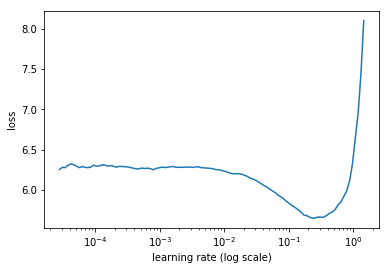

In [7]:
learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(0.1, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      3.163898   0.935607   0.818103  
    1      1.991483   0.517875   0.86247                    
    2      1.397956   0.453769   0.868394                   
    3      1.416986   0.500261   0.840335                   
    4      1.203892   0.467368   0.871649                   
    5      0.986518   0.380622   0.891831                    
    6      0.89796    0.372724   0.888576                    



[0.3727237, 0.8885758196314176]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 110/136 [00:02<00:00, 37.39it/s, loss=3.35] 


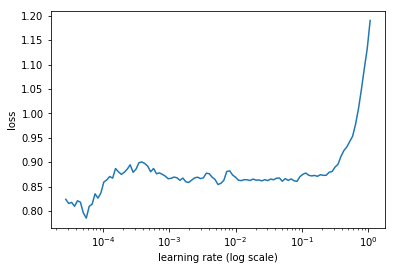

In [9]:
learn.lr_find()
learn.sched.plot()

## Learn with data augmentation

In [10]:
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▉ | 121/136 [00:41<00:05,  2.93it/s, loss=4.37] 

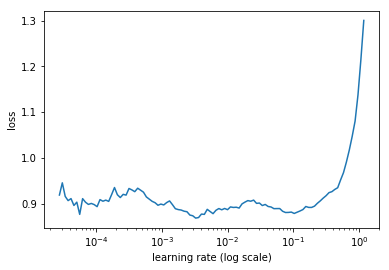

In [11]:
learn.lr_find()
learn.sched.plot()

In [ ]:
learn.fit(0.001, 2, cycle_len=5)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

 10%|█         | 14/136 [00:05<00:47,  2.58it/s, loss=0.89] 

Exception in thread Thread-16:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.879888   0.312483   0.895086  
    1      0.847462   0.311941   0.896388                    
    2      0.864701   0.310386   0.897039                    
    3      0.866385   0.313563   0.893784                    
    4      0.869164   0.308809   0.895737                    
    5      0.841716   0.312866   0.893784                    
    6      0.857132   0.309165   0.893133                    
 92%|█████████▏| 125/136 [00:40<00:03,  3.11it/s, loss=0.86] 

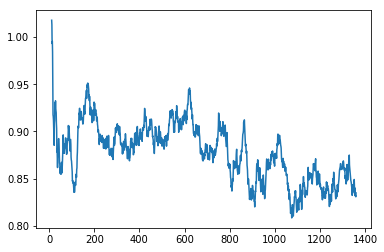

In [12]:
learn.sched.plot_loss()

## Learn unfreezing the data

In [12]:
learn.unfreeze()
learn.bn_freeze(True)

In [18]:
learn.fit([1e-5, 1e-4, 1e-3], 1, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  0%|          | 0/136 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

## Learn with different data size

In [13]:
data350 = get_data(sz=350)

In [14]:
learn.set_data(data350)

In [15]:
learn.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 120/136 [01:37<00:13,  1.23it/s, loss=4.56] 

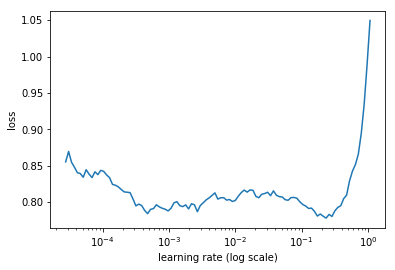

In [16]:
learn.lr_find()
learn.sched.plot()

In [17]:
learn.fit(0.0001, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  7%|▋         | 10/136 [00:09<02:02,  1.03it/s, loss=0.769]

Exception in thread Thread-28:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.808129   0.345071   0.912664  
    1      0.813727   0.344384   0.912664                    
    2      0.815312   0.344259   0.912664                    
    3      0.793595   0.343      0.913966                    
 29%|██▉       | 40/136 [00:34<01:22,  1.16it/s, loss=0.804]


KeyboardInterrupt: 